In [11]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def epsilon_greedy_policy(q_function, state, eps):
    """
    Return a action according to Q-function
    """

    if np.random.uniform() > eps:
        return np.argmax(q_function[state]) # optimal action
    else:
        return np.random.choice(len(q_function[state])) # random action

In [76]:
def q_learning(env, 
               policy = epsilon_greedy_policy, 
               episodes = 200000, 
               discount = 1.0, 
               alpha = 0.01, 
               epsilon = 0.1):
    """
    Apply Q-learning method
    
    Return:
        q_function: Q-funciton (np.array (nS, nA))
        accumulate_reward_per_episode: record the accumulative rewards of episodes for plotting (list)
    """
    
    q_function = np.random.rand(env.nS, env.nA)
    # q_function = np.zeros((env.nS, env.nA))
    
    accumulate_reward_per_episode = [] # for plot
    accumulate_reward = 0
    
    for i in range(episodes):
        
        state = env.reset()
        
        
        for t in range(10000):
            
            action = policy(q_function, state, epsilon)
            next_state, reward, done, _ = env.step(action)
            
            optimal_action = np.argmax(q_function[next_state])
            
            td_target = reward + discount * q_function[next_state][optimal_action]
            td_error = td_target - q_function[state][action]
            q_function[state][action] += alpha * td_error
            
            accumulate_reward += reward # for plot
            
            if done:
                break
            
            state = next_state

        accumulate_reward_per_episode.append(accumulate_reward)
        
    return q_function, accumulate_reward_per_episode


In [77]:
env = gym.make('FrozenLake-v1')

In [82]:
q, r = q_learning(env)

In [83]:
value = np.zeros(env.nS)
for i in range(env.nS):
    value[i] = np.max(q[i])

In [84]:
print(np.argmax(q, axis = 1).reshape(4, 4))
print(value.reshape(4,4))

print("-" * 15, "ENV", "-" * 15)
env.reset()
env.render()
env.close()

[[0 3 0 1]
 [0 0 0 1]
 [3 1 0 0]
 [0 2 1 3]]
[[1.21856905 1.15651557 1.10190758 0.9208724 ]
 [1.21880611 0.83005238 1.02144438 0.77636339]
 [1.21947098 1.21934915 1.17940598 0.94839018]
 [0.71563504 1.2558458  1.28707639 0.32498242]]
--------------- ENV ---------------

SFFF
FHFH
FFFH
HFFG


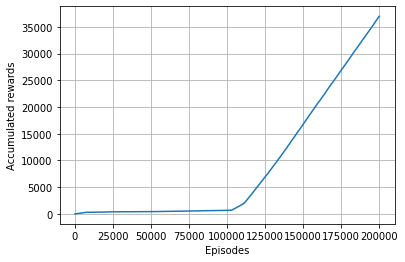

In [85]:
x = [i for i in range(len(r))]
y = r
plt.plot(x, y)
plt.xlabel("Episodes")
plt.ylabel("Accumulated rewards")
plt.grid()
plt.show()